# Data modelling and Results.

This notebook is about running various machine learning classification Models on our dataset.  
We will run the following models:  
- Logistic Regression  
- Decision Tree
- Random Forest 
- Boosting tools
- PCA (Logistic Regression)
- Neural network (MLP classifier)

We will also look at feature importance and predictive power


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier

We will load our dataset that we exported at the end of our cleaning notebook. 

In [17]:
df=pd.read_csv('data/dataset_w_clearance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637479 entries, 0 to 637478
Data columns (total 26 columns):
Unnamed: 0               637479 non-null int64
Record ID                637479 non-null int64
Agency Code              637479 non-null object
Agency Name              637479 non-null object
Agency Type              637479 non-null object
City                     637479 non-null object
State                    637479 non-null object
Year                     637479 non-null int64
Month                    637479 non-null int64
Incident                 637479 non-null int64
Crime Type               637479 non-null object
Crime Solved             637479 non-null int64
Victim Sex               637479 non-null object
Victim Age               637479 non-null int64
Victim Race              637479 non-null object
Victim Ethnicity         637479 non-null object
Perpetrator Sex          637479 non-null object
Perpetrator Age          637479 non-null float64
Perpetrator Race         637479

In [41]:
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Record ID,1,2,3,4,5
Agency Code,AK00101,AK00101,AK00101,AK00101,AK00101
Agency Name,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
Agency Type,Municipal Police,Municipal Police,Municipal Police,Municipal Police,Municipal Police
City,Anchorage,Anchorage,Anchorage,Anchorage,Anchorage
State,Alaska,Alaska,Alaska,Alaska,Alaska
Year,1980,1980,1980,1980,1980
Month,1,3,3,4,4
Incident,1,1,2,1,2


In [18]:
df.shape

(637479, 26)

### Building Models

Target: Crime Solved 
    Our target column is if the crime was solved or not. It is a binary column where 1: Homicide solved 0: Unsolved
    
Features: Here we will only include features of the case where it makes sense and would not increase our number of dummied columns into 1000s. 
   - Agency features: our of the agency information columns we will only include agency type.
   - Victim characteristics: we will incllude all the information.
   - Perpetrator characteristics: we will not include any of this. Information is only available for solved crimes and unsolved crimes have 'unknown' value in each of these columns.Including it would leak information.
   - Relationship :  variable describing the relationship between the victim and the offender,we will not include any of this. Information is only available for solved crimes and unsolved crimes have 'unknown' value.
   - Weapon: Weapon used in the homicide,This is an important feature to include.
   - Rate: Clearance rate of the agency


After assigning X,y , we will one-Hot encode our features and most of them are categorical.
    

In [44]:
X=df[['Year', 'Month',
      'State','Agency Type',
      'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Count','Victim Ethnicity',
              #'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race','Perpetrator Ethnicity', 'Relationship', 
              'Weapon','rate']]
X_dum=pd.get_dummies(X)
y=df['Crime Solved']

#### We will do the training and test split of 70:30.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=1
                                                   )

In [46]:
X_train.shape

(446235, 90)

Fitting a Logistic Regression

In [24]:
logistic_regression_model = LogisticRegression(C=1)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
y_train_p=logistic_regression_model.predict(X_train)
print(f'The score on the training set: {accuracy_score(y_train,y_train_p)}')
print(f'The score on the testing set: {accuracy_score(y_test,y_pred)}')

The score on the training set: 0.715826862527592
The score on the testing set: 0.7175231641254105


We will now see the confusion matrix and Classification report

In [25]:
y_pred = logistic_regression_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 12944,  43915],
       [ 10107, 124278]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.23      0.32     56859
           1       0.74      0.92      0.82    134385

    accuracy                           0.72    191244
   macro avg       0.65      0.58      0.57    191244
weighted avg       0.69      0.72      0.67    191244



Using grid CV to get the best hyperparameters

In [27]:
import warnings
warnings.filterwarnings("ignore")
param_grid = {'C': [0.01, 0.1, 1, 10,100]}
logistic = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=logistic,param_grid=param_grid,n_jobs=-1)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.72
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


#### Decision tree CLassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
train_accuracy = DT_model.score(X_train, y_train)
test_accuracy = DT_model.score(X_test, y_test)
print(f'Train accuracy is {train_accuracy}')
print(f'Test accuracy is {test_accuracy}')

Train accuracy is 0.9853754187815837
Test accuracy is 0.6665150279224447


Finding optimum max depth of or decision tree

In [47]:
depth = list(range(1, 30))

# empty list that will hold cv scores
cv_scores_DT = []

# perform 5-fold cross validation
for d in depth:
    DT = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_DT.append(scores.mean())
    print(f'checking for depth of= {d}')

checking for depth of= 1
checking for depth of= 2
checking for depth of= 3
checking for depth of= 4
checking for depth of= 5
checking for depth of= 6
checking for depth of= 7
checking for depth of= 8
checking for depth of= 9
checking for depth of= 10
checking for depth of= 11
checking for depth of= 12
checking for depth of= 13
checking for depth of= 14
checking for depth of= 15
checking for depth of= 16
checking for depth of= 17
checking for depth of= 18
checking for depth of= 19
checking for depth of= 20
checking for depth of= 21
checking for depth of= 22
checking for depth of= 23
checking for depth of= 24
checking for depth of= 25
checking for depth of= 26
checking for depth of= 27
checking for depth of= 28
checking for depth of= 29


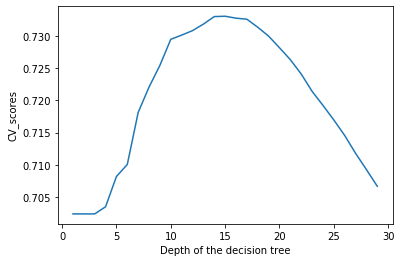

In [49]:
#plotting scores against the depth of the tree
plt.figure()
plt.plot(depth,cv_scores_DT)
plt.xlabel('Depth of the decision tree')
plt.ylabel('CV_scores')
plt.show()

In [50]:
depth[np.argmax(cv_scores_DT)]

15

Running decision tree model with a max depth of 15

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=15)
DT_model.fit(X_train, y_train)
train_accuracy = DT_model.score(X_train, y_train)
test_accuracy = DT_model.score(X_test, y_test)
print(f'Train accuracy is {train_accuracy}')
print(f'Test accuracy is {test_accuracy}')

Train accuracy is 0.7483227925504036
Test accuracy is 0.7351478421567562


In [19]:
y_pred = DT_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43     43649
           1       0.76      0.90      0.83    103535

    accuracy                           0.74    147184
   macro avg       0.68      0.62      0.63    147184
weighted avg       0.71      0.74      0.71    147184



FInding Feature importance form the decision tree model

In [20]:
DT_model.feature_importances_
Feature = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(DT_model.feature_importances_))], axis = 1)
Feature.columns=['Feature','Coeff']
Feature.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
4,rate,0.475167
2,Victim Age,0.086747
80,Weapon_Firearm,0.059685
89,Weapon_Unknown,0.051642
0,Year,0.045482
37,State_New York,0.041967
13,State_District of Columbia,0.028462
1,Month,0.025755
87,Weapon_Strangulation,0.019577
9,State_California,0.017604


We have 90 different features. Lets see if we can use PCA to resuce Dimensionality. We wont sclae the data here as most features are dummies. 

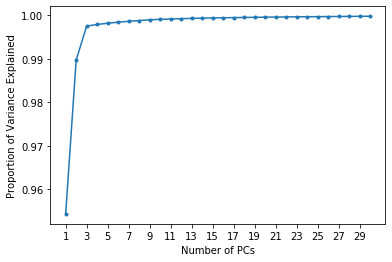

In [21]:
# stating with 30 component
my_pca = PCA(n_components=30)
my_pca.fit(X_train)

# transform data 
X_PCA = my_pca.transform(X_train)
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
plt.figure()
plt.plot(range(1,31),expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,31,2))
plt.show()

The above graph for cumulative variance vs number of components shows that 2 components can explain almost 99% of the variance. 

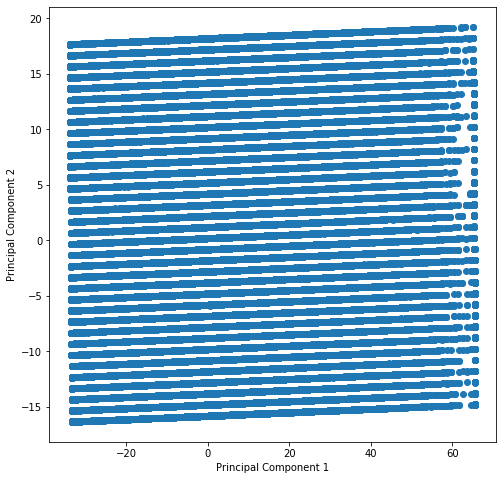

In [48]:
my_pca = PCA(n_components=2)
my_pca.fit(X_train)

# transform data 
X_PCA = my_pca.transform(X_train)
X_test_PCA=my_pca.transform(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(X_PCA[:,0],X_PCA[:,1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

Lets run a Logistic regression on the PCA of 2 components

In [23]:
log_PCA = LogisticRegression()
log_PCA.fit(X_PCA, y_train)
y_pred = log_PCA.predict(X_test_PCA)
y_train_p=log_PCA.predict(X_PCA)
print(f'The score on the training set: {accuracy_score(y_train,y_train_p)}')
print(f'The score on the testing set: {accuracy_score(y_test,y_pred)}')

/Users/J/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score on the training set: 0.701754079457703
The score on the testing set: 0.7040167409501032


PCA gives us good results but we lose a lot of interpretability.   
Next we will run a random forest classifier with 20 estimators

In [7]:
my_random_forest = RandomForestClassifier(n_estimators=20)
my_random_forest.fit(X_train, y_train)
decision_tree_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))
    
print("Performance on fitted data:")
print(f"Best Decision Tree: {max(decision_tree_scores)}")
print(f"Worst Decision Tree: {min(decision_tree_scores)}")
print(f"Average Decision Tree: {np.mean(decision_tree_scores)}")
print(f"Random Forest: {my_random_forest.score(X_train, y_train)}")

Performance on fitted data:
Best Decision Tree: 0.8686303970555691
Worst Decision Tree: 0.8659864658676637
Average Decision Tree: 0.8672564555015899
Random Forest: 0.9792649405406665


In [8]:
print(f"Random Forest: {my_random_forest.score(X_test, y_test)}")

Random Forest: 0.7128560169583651


Not much improvement in accuracy.

We will stick to logistic regression for the sake of interpretability . Lets see what the coeeficients values tells us


In [36]:
logistic_regression_model = LogisticRegression(C=1)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
y_train_p=logistic_regression_model.predict(X_train)
print(f'The score on the training set: {accuracy_score(y_train,y_train_p)}')
print(f'The score on the testing set: {accuracy_score(y_test,y_pred)}')

The score on the training set: 0.7081358477035643
The score on the testing set: 0.7095072263705006


In [37]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logistic_regression_model.coef_))], axis = 1)
coefficients.columns=['Feature','Coeff']
coefficients.sort_values(by='Coeff').head(20)

,Feature,Coeff
36,Weapon_Strangulation,-0.790968
38,Weapon_Unknown,-0.693656
29,Weapon_Firearm,-0.616343
20,Victim Ethnicity_Hispanic,-0.311316
18,Victim Race_Unknown,-0.276796
5,Agency Type_County Police,-0.262404
28,Weapon_Fire,-0.237438
6,Agency Type_Municipal Police,-0.203830
13,Victim Sex_Male,-0.186391
30,Weapon_Gun,-0.181329


In [31]:
coefficients.sort_values(by='Coeff',ascending=False).head(25)

,Feature,Coeff
4,rate,1.736964
86,Weapon_Shotgun,0.620678
85,Weapon_Rifle,0.569578
83,Weapon_Knife,0.538358
47,State_Tennessee,0.453484
45,State_South Carolina,0.427820
5,State_Alabama,0.309874
74,Weapon_Blunt Object,0.303256
29,State_Mississippi,0.203386
18,State_Illinois,0.188547


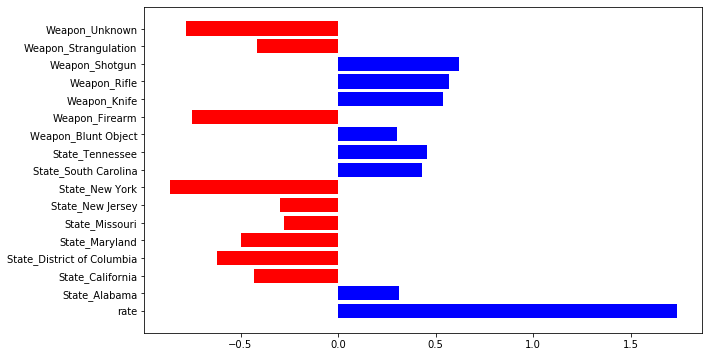

In [33]:
top_coeff=coefficients[abs(coefficients["Coeff"])>0.25]
bar_names=top_coeff['Feature']
bar_heights=top_coeff['Coeff']
bar_colors=np.where(bar_heights>0.0,'blue','red')

plt.figure(figsize=(10,6))
plt.barh(bar_names,bar_heights,color=bar_colors)
plt.savefig('coeff');
plt.show()

#### Let us also fit a model without including state information and see what are the strong predictors

In [51]:
X=df[['Year', 'Month',
      #'State',
      'Agency Type',
      'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Count','Victim Ethnicity',
     #'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race','Perpetrator Ethnicity', 'Relationship', 
     'Weapon','rate']]
X_dum=pd.get_dummies(X)
y=df['Crime Solved']

#### We will do the training and test split of 70:30.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=1
                                                   )

In [53]:
X_train.shape

(446235, 39)

Fitting a Logistic Regression

In [54]:
logistic_regression_model = LogisticRegression(C=1)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
y_train_p=logistic_regression_model.predict(X_train)
print(f'The score on the training set: {accuracy_score(y_train,y_train_p)}')
print(f'The score on the testing set: {accuracy_score(y_test,y_pred)}')

The score on the training set: 0.7081358477035643
The score on the testing set: 0.7095072263705006


In [55]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logistic_regression_model.coef_))], axis = 1)
coefficients.columns=['Feature','Coeff']
coefficients.sort_values(by='Coeff').head(20)

,Feature,Coeff
36,Weapon_Strangulation,-0.790968
38,Weapon_Unknown,-0.693656
29,Weapon_Firearm,-0.616343
20,Victim Ethnicity_Hispanic,-0.311316
18,Victim Race_Unknown,-0.276796
5,Agency Type_County Police,-0.262404
28,Weapon_Fire,-0.237438
6,Agency Type_Municipal Police,-0.203830
13,Victim Sex_Male,-0.186391
30,Weapon_Gun,-0.181329


In [56]:
coefficients.sort_values(by='Coeff',ascending=False).head(20)

,Feature,Coeff
4,rate,1.622258
34,Weapon_Rifle,0.816598
35,Weapon_Shotgun,0.787972
32,Weapon_Knife,0.456878
10,Agency Type_State Police,0.281287
19,Victim Race_White,0.233743
23,Weapon_Blunt Object,0.215124
12,Victim Sex_Female,0.182531
8,Agency Type_Sheriff,0.157874
22,Victim Ethnicity_Unknown,0.150525


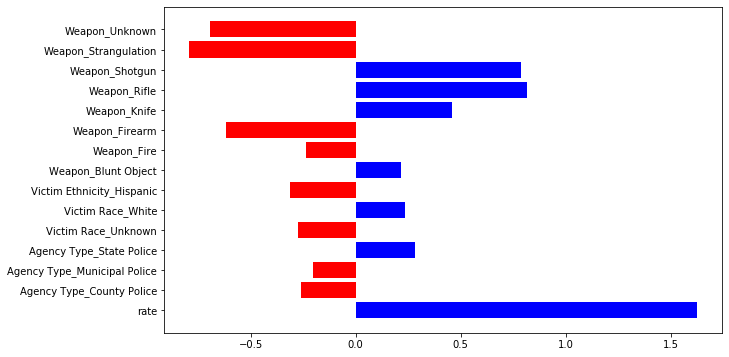

In [57]:
top_coeff=coefficients[abs(coefficients["Coeff"])>0.20]
bar_names=top_coeff['Feature']
bar_heights=top_coeff['Coeff']
bar_colors=np.where(bar_heights>0.0,'blue','red')

plt.figure(figsize=(10,6))
plt.barh(bar_names,bar_heights,color=bar_colors)
plt.savefig('coeff');
plt.show()

### Additional classification models ran 
- Boosting classifiers
- Naive Bayes Classifiers
- MLP Classifier

In [32]:

AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

AB_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(X_test, y_test)}")
print(f"GRadient score: {GB_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.7164569518425916
GRadient score: 0.720479128166105


In [33]:
print(f"AdaBoost score: {AB_model.score(X_train, y_train)}")
print(f"GRadient score: {GB_model.score(X_train, y_train)}")

AdaBoost score: 0.7164471155526049
GRadient score: 0.7205236614370406


In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
Gnbmodel = GaussianNB()
# Fit our model
Gnbmodel.fit(X_train,y_train)
y_pred_GB=Gnbmodel.predict(X_test)#get hard prediction
y_t_pred=Gnbmodel.predict(X_train)
print(f'The score on the training set: {accuracy_score(y_train,y_t_pred)}')
print(f'The score on the testing set: {accuracy_score(y_test,y_pred_GB)}')
print("score",Gnbmodel.score(X_train,y_train))

The score on the training set: 0.4731461730359015
The score on the testing set: 0.4748183610844555
score 0.4731461730359015


In [16]:
NN_model = MLPClassifier()
NN_model.fit(X_train,y_train)

print(f"Train Score: {NN_model.score(X_train,y_train): 0.3f}")
print(f"Test Score: {NN_model.score(X_test,y_test): 0.3f}")

Train Score:  0.734
Test Score:  0.734
